# Matplotlib
The main tool for plotting in python is called matplotlib. We can use it, in combination with numpy, scipy, and other libraries to create beautiful, publication quality images right in our jupyter notebooks. We will piece together a number of examples first using just numpy, but will work our way towards plotting scipy results, and eventually more data-centric stuff. The full documentation for matplotlib can be found [here](https://matplotlib.org/)

In [78]:
import numpy as np
from matplotlib import pyplot as plt 

The main interface to matplotlib is via `pyplot` which wraps the matplotlib code into an interface that behaves like Matlab (a popular coding language/environment). Frankly, all of this is a bit opaque, but for much of what we will do we will work through the pyplot paradigm. 

Let's start by ploting the sine and cosine functions

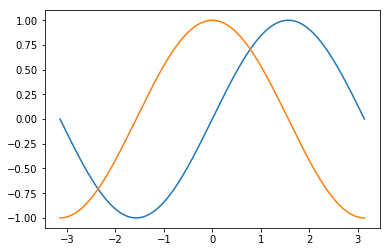

In [79]:
x = np.linspace(-np.pi,np.pi,256) #get an array of 256 evenly spaced values between -pi and pi
c = np.cos(x) # calculate cos(x)
s = np.sin(x) # calculate sin(x)

plt.plot(x,s) # create plot
plt.plot(x,c)
plt.show()  # show the plot

We can very simply change the color of the lines if we like, and their thickness, etc.

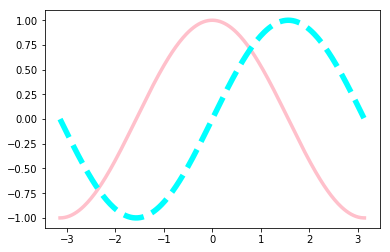

In [80]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.show()

Perhaps we are interested in limiting the range of the plot. We can do this using using the `xlim()` or `ylim()` functions which take as input a min and a max value for the limitation. Let's add a bit of space to our plot on the y-axis to make the curves a bit smaller in their framing (note we could of course do this on the x-axis too)

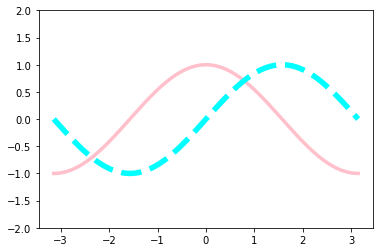

In [81]:
plt.plot(x, c, color="pink", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="cyan",  linewidth=5.5, linestyle="--")
plt.ylim(-2,2)
plt.show()

Matplotlib offers a TON of flexibility for our images. Let's add to this pretty x-tick labels that show coordinates in units of $\pi$. To do this we will rely upon matplotlib's built in `mathtext` mode which will render TeX like markup into pretty images. The full documentation for `mathtext` can be found [here](https://matplotlib.org/users/mathtext.html#mathtext-tutorial)

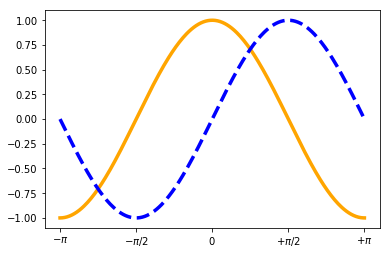

In [86]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--")
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

Let's add a legend to the figure above

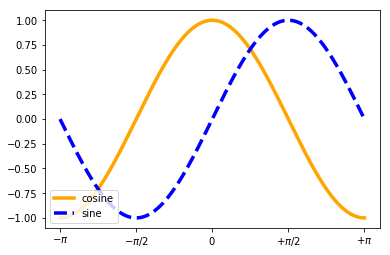

In [93]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='lower left', frameon=True)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format
plt.show()

A neat thing that matplotlib will allow us to do is change the position of the "spines" of our plot, the lines that delineate the axes that we are plotting. Let's move the spines to positions that might be more familiar in the setting of a math class. You can read about spines [here](https://matplotlib.org/api/spines_api.html#matplotlib.spines)

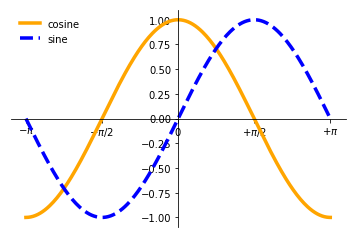

In [96]:
plt.plot(x, c, color="orange", linewidth=3.5, linestyle="-", label="cosine")
plt.plot(x, s, color="blue",  linewidth=3.5, linestyle="--", label="sine")
plt.legend(loc='upper left', frameon=False)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$']) #here is the mathtext format

### move the spines
ax = plt.gca()  # gca stands for 'get current axis'
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

plt.savefig("/Users/adk/Desktop/myimg.pdf")

## Some examples of the kinds of plots we can make
Now that we've gone through some of the basics, I'd like to do just a quick whirlwind tour of some of the basic plot types that we can create with matplotlib alone (we will eventually get to the seaborn package which opens up further possibilities)

### Scatter plots
The most common sort of plot you might make is a scatter plot. Let's use the `numpy.random` module to create multivariate normal random numbers and plot those. We will do this for two covariance matrices, one more correlated than the other


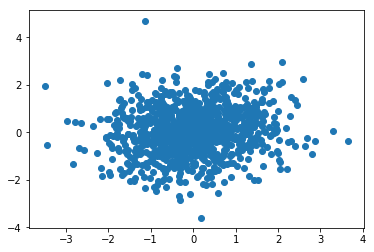

In [100]:
mean = np.array([0,0])
cov1 = np.array([[1.0,0.1],[0.1,1.0]]) #low covariance between x & y
x = np.random.multivariate_normal(mean, cov1, size=1000)
plt.scatter(x[:,0],x[:,1])
plt.show()

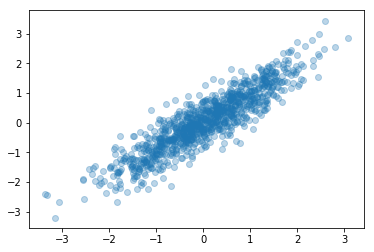

In [105]:
mean = np.array([0,0])
cov1 = np.array([[1.0,0.9],[0.9,1.0]]) # high covariance between x & y
x = np.random.multivariate_normal(mean, cov1, size=1000)
plt.scatter(x[:,0],x[:,1],alpha=0.3) # I've set alpha < 1 so that points are a bit transparent
plt.show()

## Contour plots

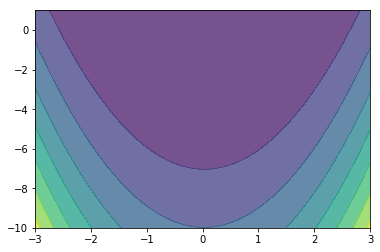

In [113]:
def banana_function(x, y):
    a = 1
    b = 2
    return((a-x)**2 + (b*(y - x**2)**2))

n = 512
x = np.linspace(-3, 3, n)
y = np.linspace(-10, 1, n)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, banana_function(X, Y), 8, alpha=.75, cmap='viridis')
#C = plt.contour(X, Y, banana_function(X, Y), 8, colors='black')
plt.show()

### histograms

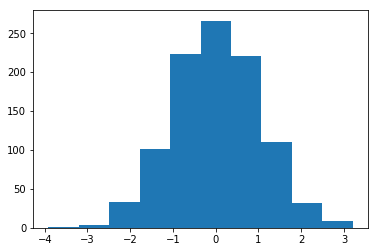

In [114]:
# choose 1000 normal RVs
x = np.random.normal(0,1,1000)
plt.hist(x)
plt.show()

## subplots
subplots in matplotlib take some care. in particular subplots are 1-indexed rather than the familiar zero indexing in the rest of the python language (why would you do this? I have no idea). the basic function `subplot()` takes three integers specifying the *number of rows* in the array of plots, the *number of columns* in the array, and the *index* of the plot you will define things about. I'll give two examples, a simple one and a more complex one.

First lets plot two scatterplots side by side

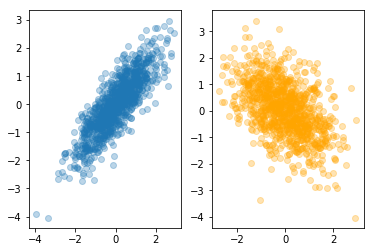

In [115]:
plt.subplot(1,2,1)
cov = np.array([[1.0,0.85],[0.85,1.0]]) #low covariance between x & y
x = np.random.multivariate_normal([0,0], cov, size=1000)
plt.scatter(x[:,0],x[:,1], alpha= 0.3)
plt.subplot(1,2,2)
cov[0,1]=cov[1,0]=-0.5
x = np.random.multivariate_normal([0,0], cov, size=1000)
plt.scatter(x[:,0],x[:,1], alpha= 0.3,color="orange")
plt.show()

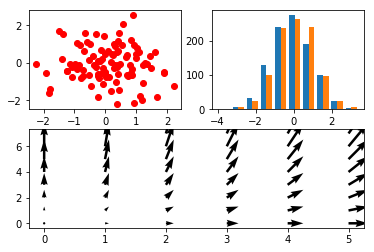

In [117]:
#quiver plot on the bottom

#scatter on the top left
plt.subplot(2, 2, 1)
plt.scatter(np.random.normal(0,1,100),np.random.normal(0,1,100),color="red")
#hist on the top right
plt.subplot(2, 2, 2)
plt.hist(x)
plt.subplot(2, 1, 2)
X, Y = np.meshgrid(range(0,6), range(8))
plt.quiver(X, Y)
plt.show()

### IMSHOW
`imshow` allows us to display images, like .jpg files. Because images are represented as numerical arrays in practice we can use the same tool to create visualizations of any sort of data

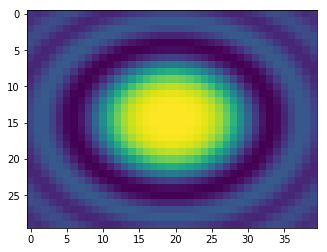

In [118]:
def f(x, y):
     return(np.sin(x**2 + y**2) / (x**2 + y**2))
n = 10
x = np.linspace(-3, 3, 4 * n)
y = np.linspace(-3, 3, 3 * n)
X, Y = np.meshgrid(x, y)
plt.imshow(f(X, Y))